<a href="https://colab.research.google.com/github/Ashwini-Padige/Machine-Learning-Algorithms/blob/main/My___KNN_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import files
#uploaded=files.upload()

##KNN UNDERSTANDING THROUGH IMAGE


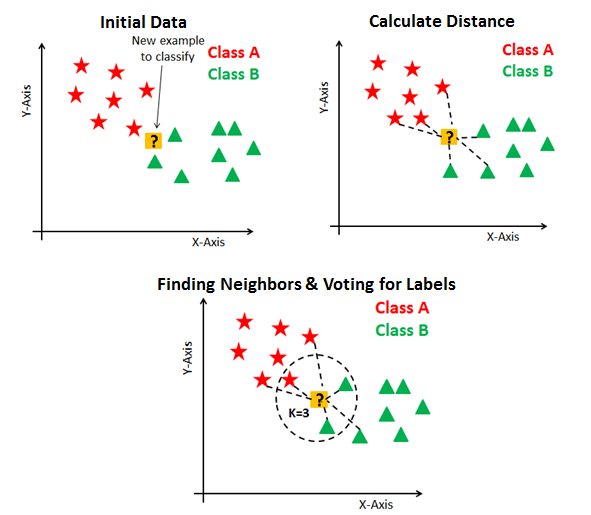

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('trainKNN.txt', header = None, names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])
df_train

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [ ]:
df_train.drop(['ID'], axis = 1, inplace = True)

In [ ]:
df_test = pd.read_csv('testKNN.txt', header = None, names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])
df_test

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [ ]:
df_test.drop(['ID'], axis = 1, inplace = True)

**Train DataSet Cleaning**

In [ ]:
df_train.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df_train.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
df_train.shape


(196, 10)

In [ ]:
df_train.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
191,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [ ]:
df_train.shape

(195, 10)

**Train DataSet Cleaning**

In [ ]:
df_test.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df_test.dtypes


RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
df_test.shape


(18, 10)

In [ ]:
df_test.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [ ]:
df_test.shape

(18, 10)

We are concating train and test as test data has only 8% of data which is insufficient. After concating we split train and test by 75:25


In [ ]:
df = pd.concat([df_train, df_test], axis = 0).reset_index()
df

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,13,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.0,6
209,14,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
210,15,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,16,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.drop(['index'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

**Spliting Data**

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
y = df['Type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Fitting K-NN to the Training set**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

**Euclidean distance model**

In [ ]:
euc = KNeighborsClassifier(3, metric = distance.sqeuclidean)
euc.fit(X_train, y_train)
euc.score(X_train, y_train)

0.8187919463087249

**Manhattan distance model**

In [ ]:
man = KNeighborsClassifier(3, metric = distance.cityblock)
man.fit(X_train, y_train)
man.score(X_train, y_train)

0.8389261744966443

In [ ]:
euc_predict = euc.predict(X_test)
man_predict = man.predict(X_test)
comp_predict = pd.DataFrame({'Actual' : y_test, 'Euclidean Method' : euc_predict, 'Manhattan Method' : man_predict})
comp_predict

,Actual,Euclidean Method,Manhattan Method
0,3,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,7,7,7
...,...,...,...
59,5,5,5
60,1,2,2
61,2,2,2
62,1,1,1


In [ ]:
a = comp_predict[comp_predict['Actual'] == comp_predict['Euclidean Method']]
euc_accuracy = ((len(a)*100)/len(comp_predict))
euc_accuracy

67.1875

In [ ]:
b = comp_predict[comp_predict['Actual'] == comp_predict['Manhattan Method']]
man_accuracy = ((len(b)*100)/len(comp_predict))
man_accuracy

71.875